In [1]:
import spherical_inr as sph
import torch 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cartopy.crs as ccrs


In [12]:
hnet = sph.HerglotzNet( 
    L = 10,
    output_dim=1,
    mlp_sizes = 3*[100],
    pe_kwargs={
        "init_exponents" : True
    },
    mlp_kwargs={
        "omega0": 5.0,
    }
)

In [3]:
siren = sph.SirenNet(
    num_atoms = 10**2,
    input_dim=2,
    output_dim=1, 
    mlp_sizes= 3*[100],
    mlp_kwargs={
        "omega0": 5.0,
    }
)

In [4]:
sph_siren = sph.SphericalSirenNet(
    L = 10,
    output_dim =1,
    mlp_sizes= 3*[100],
    mlp_kwargs={
        "omega0": 5.0,
    }
)

In [5]:
def target(theta, phi):
    return torch.sin(3*theta) * torch.cos(5*phi)

In [6]:
# Generate a grid of theta and phi values
theta = torch.linspace(0, torch.pi, 100)
phi = torch.linspace(0, 2 * torch.pi, 100)
theta, phi = torch.meshgrid(theta, phi, indexing='ij')

xtrain = torch.stack([theta, phi], dim=-1).reshape(-1, 2)
ytrain = target(theta, phi).reshape(-1, 1)

In [13]:
num_epochs = 1000
optimizer = torch.optim.Adam(hnet.parameters(), lr=1e-3)

for epoch in range(num_epochs):
    optimizer.zero_grad()
    ypred = hnet(xtrain)
    loss = torch.mean((ypred - ytrain)**2)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss {loss.item():.5f}")

Epoch 0, Loss 0.26832
Epoch 100, Loss 0.01900
Epoch 200, Loss 0.00330
Epoch 300, Loss 0.00161
Epoch 400, Loss 0.00104
Epoch 500, Loss 0.00078
Epoch 600, Loss 0.00062
Epoch 700, Loss 0.00062
Epoch 800, Loss 0.00040
Epoch 900, Loss 0.00034


In [8]:
num_epochs = 1000
optimizer = torch.optim.Adam(siren.parameters(), lr=1e-3)

for epoch in range(num_epochs):
    optimizer.zero_grad()
    ypred = siren(xtrain)
    loss = torch.mean((ypred - ytrain)**2)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss {loss.item():.5f}")

Epoch 0, Loss 0.25954
Epoch 100, Loss 0.24670
Epoch 200, Loss 0.12334
Epoch 300, Loss 0.00350
Epoch 400, Loss 0.00069
Epoch 500, Loss 0.00033
Epoch 600, Loss 0.00021
Epoch 700, Loss 0.00014
Epoch 800, Loss 0.00013
Epoch 900, Loss 0.00030


In [9]:
num_epochs = 1000
optimizer = torch.optim.Adam(sph_siren.parameters(), lr=1e-3)

for epoch in range(num_epochs):
    optimizer.zero_grad()
    ypred = sph_siren(xtrain)
    loss = torch.mean((ypred - ytrain)**2)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss {loss.item():.5f}")

Epoch 0, Loss 0.26694
Epoch 100, Loss 0.00165
Epoch 200, Loss 0.00072
Epoch 300, Loss 0.00047
Epoch 400, Loss 0.00027
Epoch 500, Loss 0.00019
Epoch 600, Loss 0.00014
Epoch 700, Loss 0.00011
Epoch 800, Loss 0.00010
Epoch 900, Loss 0.00008


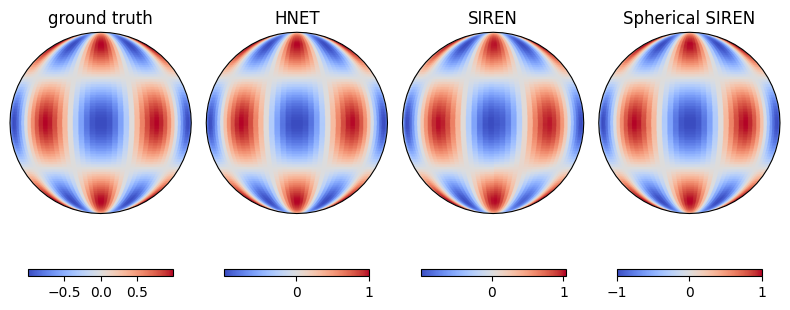

In [14]:
ypred_hnet_plot = hnet(xtrain).detach().numpy().reshape(100, 100)
ypred_siren_plot = siren(xtrain).detach().numpy().reshape(100, 100)
ypred_sh_siren_plot = sph_siren(xtrain).detach().numpy().reshape(100, 100)
ytrain_plot = ytrain.numpy().reshape(100, 100)


fig = plt.figure(figsize=(8, 4), dpi=100)

ax1 = fig.add_subplot(141, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0))
im1 = ax1.imshow(ytrain_plot, extent=[0, 360, -90, 90], transform=ccrs.PlateCarree(), cmap="coolwarm")
ax1.set_title("ground truth")
fig.colorbar(im1, ax=ax1, orientation='horizontal', shrink=0.8)

ax2 = fig.add_subplot(142, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0))
im2 = ax2.imshow(ypred_hnet_plot, extent=[0, 360, -90, 90], transform=ccrs.PlateCarree(), cmap="coolwarm")
ax2.set_title("HNET")
fig.colorbar(im2, ax=ax2, orientation='horizontal', shrink=0.8)

ax3 = fig.add_subplot(143, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0))
im3 = ax3.imshow(ypred_siren_plot, extent=[0, 360, -90, 90], transform=ccrs.PlateCarree(), cmap="coolwarm")
ax3.set_title("SIREN")
fig.colorbar(im3, ax=ax3, orientation='horizontal', shrink=0.8)

ax4 = fig.add_subplot(144, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0))
im4 = ax4.imshow(ypred_sh_siren_plot, extent=[0, 360, -90, 90], transform=ccrs.PlateCarree(), cmap="coolwarm")
ax4.set_title("Spherical SIREN")
fig.colorbar(im4, ax=ax4, orientation='horizontal', shrink=0.8)


plt.tight_layout()
plt.show()